In [10]:
##from config import api_key
from citipy import citipy

import random
import requests

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import matplotlib

plt.style.use("seaborn")

In [11]:
lat_zone = np.arange(-90,90,15)
lon_zone = np.arange(-200,200,15)
cities_df = pd.DataFrame()
cities_df["Latitude"] = ""
cities_df["Longitude"] = ""

In [12]:
for x in lat_zone:
    for y in lon_zone:
        x_values = list(np.arange(x,x+15,0.01))
        y_values = list(np.arange(y,y+15,0.01))
        lats = random.sample(x_values,50)
        lons = random.sample(y_values,50)
        lat_samples = [(x+dec_lat) for dec_lat in lats]
        lon_samples = [y+dec_lon for dec_lon in lons]
        cities_df = cities_df.append(pd.DataFrame.from_dict({"Latitude":lat_samples,
                                       "Longitude":lon_samples}))
cities_df = cities_df.reset_index(drop=True)
cities_df.shape

(16200, 2)

In [13]:
cities_df["Closest City name"] = ""
cities_df["Closest Country code"] = ""
for index,row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    cities_df.set_value(index,"Closest City name",city.city_name)
    cities_df.set_value(index,"Closest Country code",city.country_code)

In [14]:
clean_cities_df = cities_df.drop(['Latitude', 'Longitude'],axis=1)
clean_cities_df
clean_cities_df = clean_cities_df.drop_duplicates()
clean_cities_df.shape

(860, 2)

In [15]:
selected_cities = clean_cities_df.sample(500)

selected_cities = selected_cities.reset_index(drop=True)

In [16]:
base_url = "http://api.openweathermap.org/data/2.5/weather"

app_id = "25bc90a1196e6f153eece0bc0b0fc9eb"

params = { "appid" :app_id,"units":"metric" }

In [18]:


for index,row in selected_cities.iterrows():
    params["q"] =f'{row["Closest City name"]},{row["Closest Country code"]}'
    print(f"Retrieving weather information for {params['q']}")
    city_weather_resp = requests.get(base_url,params)
    city_weather_resp  = city_weather_resp.json()
    selected_cities.set_value(index,"Latitude",city_weather_resp.get("coord",{}).get("lat"))
    selected_cities.set_value(index,"Longitude",city_weather_resp.get("coord",{}).get("lon"))
    selected_cities.set_value(index,"Temperature",city_weather_resp.get("main",{}).get("temp_max"))
    selected_cities.set_value(index,"Wind speed",city_weather_resp.get("wind",{}).get("speed"))
    selected_cities.set_value(index,"Humidity",city_weather_resp.get("main",{}).get("humidity"))
    selected_cities.set_value(index,"Cloudiness",city_weather_resp.get("clouds",{}).get("all"))

Retrieving weather information for beipiao,cn
Retrieving weather information for zhanaozen,kz
Retrieving weather information for maridi,sd
Retrieving weather information for puerto escondido,mx
Retrieving weather information for fort smith,us
Retrieving weather information for hamilton,bm
Retrieving weather information for louis trichardt,za
Retrieving weather information for erenhot,cn
Retrieving weather information for hervey bay,au
Retrieving weather information for el corpus,hn
Retrieving weather information for cap malheureux,mu
Retrieving weather information for igarka,ru
Retrieving weather information for raudeberg,no
Retrieving weather information for sinjah,sd
Retrieving weather information for point pedro,lk
Retrieving weather information for siavonga,zm
Retrieving weather information for rawannawi,ki
Retrieving weather information for pacific grove,us
Retrieving weather information for ontario,us
Retrieving weather information for shchelyayur,ru
Retrieving weather informatio

Retrieving weather information for presidencia roque saenz pena,ar
Retrieving weather information for beyneu,kz
Retrieving weather information for traverse city,us
Retrieving weather information for barcelona,ve
Retrieving weather information for loa janan,id
Retrieving weather information for komsomolskiy,ru
Retrieving weather information for huarmey,pe
Retrieving weather information for qaanaaq,gl
Retrieving weather information for susanville,us
Retrieving weather information for morton,us
Retrieving weather information for balkanabat,tm
Retrieving weather information for san rafael del sur,ni
Retrieving weather information for tucuman,ar
Retrieving weather information for fez,ma
Retrieving weather information for attawapiskat,ca
Retrieving weather information for mayor pablo lagerenza,py
Retrieving weather information for belaya gora,ru
Retrieving weather information for morro bay,us
Retrieving weather information for nata,bw
Retrieving weather information for ahuimanu,us
Retrieving

Retrieving weather information for yeppoon,au
Retrieving weather information for grand island,us
Retrieving weather information for banamba,ml
Retrieving weather information for mabaruma,gy
Retrieving weather information for shakawe,bw
Retrieving weather information for pietersburg,za
Retrieving weather information for pietarsaari,fi
Retrieving weather information for ponta delgada,pt
Retrieving weather information for lasa,cn
Retrieving weather information for redcliffe,zw
Retrieving weather information for srednekolymsk,ru
Retrieving weather information for narsaq,gl
Retrieving weather information for ballina,au
Retrieving weather information for mehriz,ir
Retrieving weather information for kaitangata,nz
Retrieving weather information for karratha,au
Retrieving weather information for montoro,es
Retrieving weather information for kysyl-syr,ru
Retrieving weather information for khonuu,ru
Retrieving weather information for pingzhuang,cn
Retrieving weather information for emet,tr
Retrie

In [19]:
selected_cities = selected_cities.dropna()

selected_cities.shape
selected_cities.to_csv("City_Weather_data.csv")

In [20]:
def set_plot_prop(x_title,x_lim,y_title):
    plt.title(f"{y_title} vs {x_title}")
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.grid(True)
    plt.xlim(x_lim)

In [21]:
selected_cities.plot(kind="scatter",x="Latitude",y="Temperature",grid=True,color="blue")

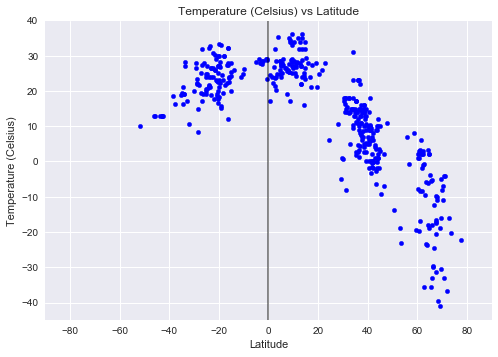

In [22]:
set_plot_prop("Latitude",[-90,90],"Temperature (Celsius)")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Temperature vs Latitude")
plt.show()

In [23]:
selected_cities.plot(kind="scatter",x="Latitude",y="Humidity",grid=True,color="blue")

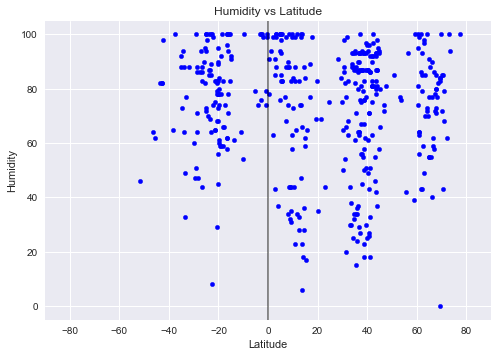

In [24]:
set_plot_prop("Latitude",[-90,90],"Humidity")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Humidity vs Latitude")
plt.show()

In [25]:
selected_cities["Wind speed"] = pd.to_numeric(selected_cities["Wind speed"])
selected_cities.plot(kind="scatter",x="Latitude",y="Wind speed",grid=True,color="blue")

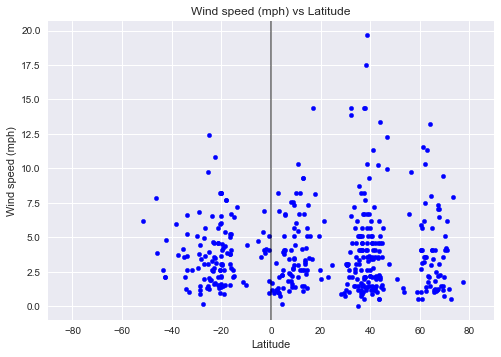

In [26]:
set_plot_prop("Latitude",[-90,90],"Wind speed (mph)")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Wind speed vs Latitude")
plt.show()

In [27]:
selected_cities["Cloudiness"] = pd.to_numeric(selected_cities["Cloudiness"])
selected_cities.plot(kind="scatter",x="Latitude",y="Cloudiness",grid=True,color="blue")

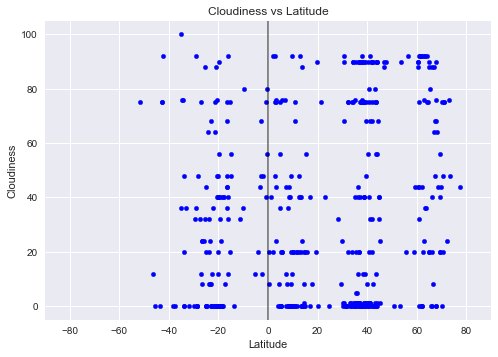

In [28]:
set_plot_prop("Latitude",[-90,90],"Cloudiness")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Cloudiness vs Latitude")
plt.show()

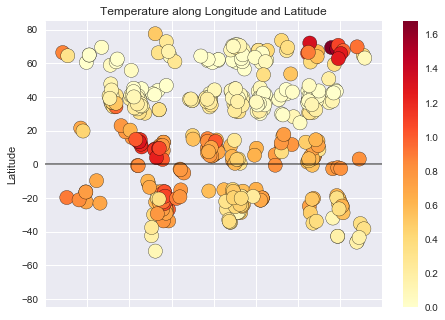

In [29]:
size_temp = np.round((((selected_cities.Temperature)/100)**2)*10,2)

selected_cities.plot(kind="scatter",x="Longitude",y="Latitude",grid=True, edgecolor="black",
                     c=size_temp,s=200,cmap=plt.cm.YlOrRd)
plt.xlabel("Longitude")
plt.tight_layout()
plt.title("Temperature along Longitude and Latitude")
plt.ylabel("Latitude")
plt.ylim([-85,85])
plt.grid(True)

plt.xlim([-200,200])
plt.subplots_adjust(bottom=.25, left=.25)

plt.axhline(0, color='black',alpha=0.5)
plt.savefig("Temperature approaching Equator")

plt.show()